In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "black_friday.csv"
df = pd.read_csv(path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


* what we can understnad from the summary?
1. Total samples in our datset are 537577 (no of rows)
2. This dataset has 12 features(no of columns)
3. Only Product Category 2 and 3 have missing values => total no of non-null are less than total samples
4. There are 2 features of float type, 5 features of int type, 5 features of object type(String)
5. Stay_In_Current_City_Years is a number but the type it is showing is object(String) let us find why?
6. Age in dataset is range so it is Object(String)
7. product category 2,3 are shown float let us find why?

In [4]:
# missing data
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
df['Product_Category_2'].unique() # gives different values in that column

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [6]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [7]:
df.fillna(0,inplace=True) # replace nan with 0 in that same dataframe

All the unique values after handling the missing values in product category 2,3 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.


In [8]:
df.Product_Category_3 = df.Product_Category_3.astype('int64')
df.Product_Category_2 = df.Product_Category_2.astype('int64')

In [9]:
print(df['Product_Category_2'].dtype)
print(df['Product_Category_3'].dtype)

int64
int64


In [10]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

Stay_In_Current_City_Years feature contains few values as strings("4+") so the data type remains Object.

In [11]:
# check duplicate values
sum(df.duplicated())

0

So the dataset doesn't contains any duplicated values. It is a good news but if we had duplicate values we should drop the rows with those values because when we are training supervised learning models there is chance it memorises those rows.

### 1. which age group of customers are more likely to purchase with More amount per person?

In [12]:
data = df.groupby('Age')['Purchase'].mean()
data

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

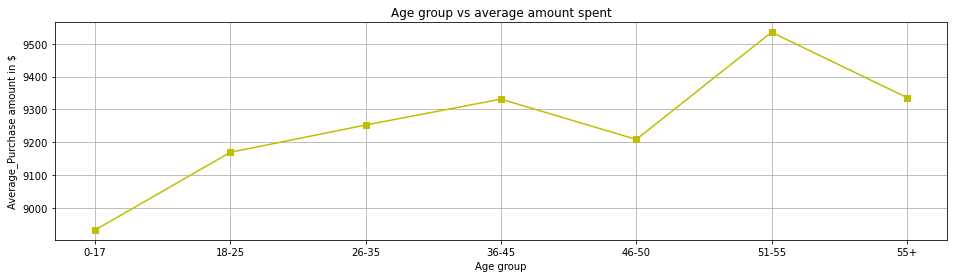

In [13]:
# plot
data  = pd.DataFrame({'Age':data.index, 'Average_purchase':data.values})
plt.figure(figsize = (16,4))
plt.plot('Age','Average_purchase','ys-',data = data);
plt.grid();
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');

People of Age group 51-55 have spent more on purchase. Approximately 9600$ on average spent by People between age 51-55.

The graph values tends to increase. so higher the age group higher the intrest in the sale.But there is a slight purchase variation in 46-50 and 50-55 age people.

### 2.which age group and gender have high visiting rate to the retail store?


In [14]:
data_age_gen = df.groupby(['Age','Gender'])[['Age','Gender']].count()
data_age_gen

Age  Gender
Age   Gender                
0-17  F         5083    5083
      M        10019   10019
18-25 F        24628   24628
      M        75032   75032
26-35 F        50752   50752
      M       168835  168835
36-45 F        27170   27170
      M        82843   82843
46-50 F        13199   13199
      M        32502   32502
51-55 F         9894    9894
      M        28607   28607
55+   F         5083    5083
      M        16421   16421

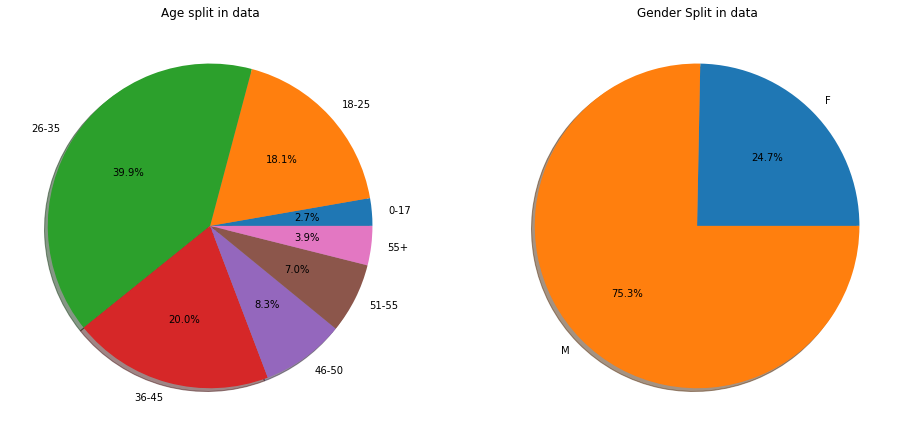

In [15]:
# plot
data_Age = df.groupby('Age')['Age'].count()
data_Sex = df.groupby('Gender')['Gender'].count()
data_Age = pd.DataFrame({'Age':data_Age.index, 'Count':data_Age.values})
data_Sex = pd.DataFrame({'Sex':data_Sex.index, 'Count':data_Sex.values})

plt.figure(figsize = (16,16))
plt.subplot(121) # 1 hàng 2 cột và ở vị trí thứ 1
plt.pie(data_Age['Count'],labels = data_Age['Age'],autopct='%1.1f%%',shadow=True);
plt.title('Age split in data');

plt.subplot(122) # # 1 hàng 2 cột và ở vị trí thứ 2
plt.pie(data_Sex['Count'],labels = data_Sex['Sex'],autopct='%1.1f%%',shadow=True);
plt.title('Gender Split in data');

If we check the second pie, By this stat we can tell that the store gets most of the male customers (75.4% male 24.6% Female).

* Now to the first Pie this will give intresting understanding when we comapre it with first question solution.
1. This shows 40% of customers are 26-35 age group and 20% are from 36-45 => 60% of customers from 26-45 age group.
2. only 7% of customers are of 51-55 Age group.

From 1st and 2nd questions we can tell 60% of customers from 26-45 who have a medium purchase rate. 7% of customers are from 51-55 who have high purchase rate. This Gives an intresting insight on sales to store owners.

### 3. which occupation type have high purchase rate?


In [16]:
data_occup = df['Occupation'].value_counts().sort_index()
data_occup

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

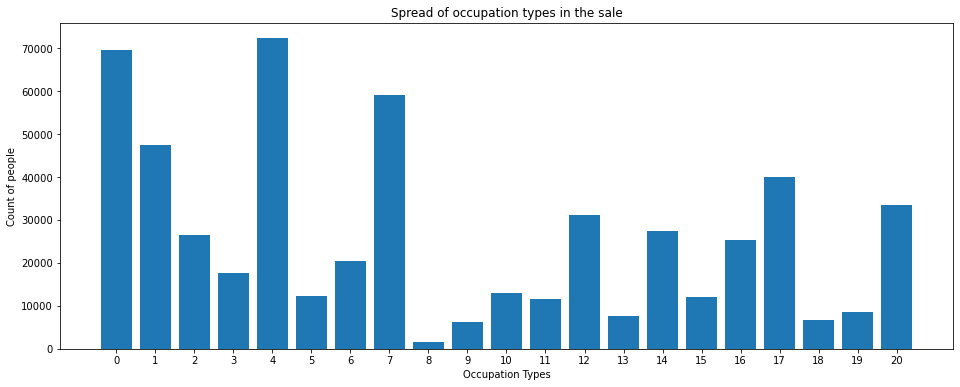

In [17]:
# plot
plt.figure(figsize = (16,6));
plt.bar(data_occup.index,data_occup.values);
plt.xticks(data_occup.index); # xticks biểu diễn liên tục
plt.xlabel('Occupation Types');
plt.ylabel('Count of people');
plt.title('Spread of occupation types in the sale');

In [18]:
data_pur = df.groupby('Occupation')['Purchase'].mean();
data_pur

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

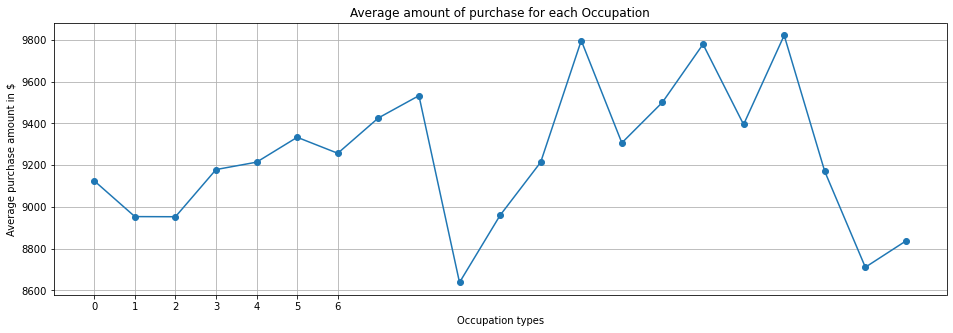

In [19]:
#plot
plt.figure(figsize=(16,5));
data_pur.plot.line(marker='o')
plt.xlabel('Occupation types');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for each Occupation');
plt.grid();
plt.xticks(data.index);

There are few points to observe from these plots

1. Occupation type 12,15,17 have high purchase rates but no of people with those occupations are not in large amount.
2. Occupations 0,4 and 7 have higghest amount of people but their average amount of purchases are less.
3. If we observe occupation 8 and 9 no of people in 8 and lesser than in 9 but the average spending of occupation 8 is roughly 800 dollars more than occupation 9.
4. If we observe 11 adn 12 total people and average spending both are more for 12. So no of people is not correlated with purchase.

### 4. who has high purchase rate newly settled or people staying from long time?

In [20]:
data_stay = df['Stay_In_Current_City_Years'].value_counts()
data_stay

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

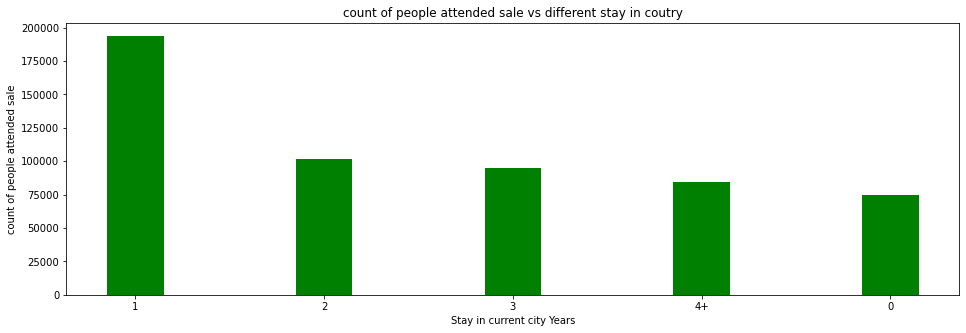

In [21]:
plt.figure(figsize=(16,5));
plt.bar(data_stay.index,data_stay.values,width=0.3,color = 'green');
plt.xlabel('Stay in current city Years');
plt.ylabel('count of people attended sale');
plt.title('count of people attended sale vs different stay in coutry');

In [22]:
data_stay_pur = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
data_stay_pur

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

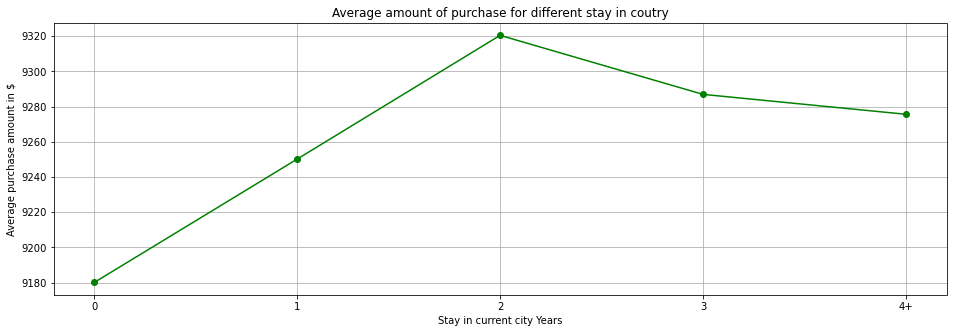

In [23]:
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data_stay_pur.index,data_stay_pur.values,'go-');
plt.xlabel('Stay in current city Years');
plt.ylabel('Average purchase amount in $');
plt.title('Average amount of purchase for different stay in coutry');

People who are 2 years residents spent more on average in the sale.Even though the 1 year reisdents visited more in sale they have not spent much but 2 years residents who are around 100,000 people visited, each have spent 9400$ on average.

### 5. Top 10 products which made highest sales in the store?

In [37]:
data1 = df.groupby('Product_ID')['Purchase'].sum().reset_index()
#  =  với data1 = df.groupby('Product_ID').agg({'Purchase':'sum'}).reset_index()
data2 = df['Product_ID'].value_counts()
# covert data2 về df mới merge được vì data2 đang ở dạng series
data2 = pd.DataFrame({'Product_ID':data2.index, 'Count':data2.values})
data = pd.merge(data1,data2,how = 'left') # gộp 2 df
data = data.sort_values(['Purchase'],ascending=False)[0:10] # lấy 10 item theo giảm dần
data

,Product_ID,Purchase,Count
249,P00025442,27995166,1615
1016,P00110742,26722309,1612
2443,P00255842,25168963,1383
582,P00059442,24338343,1406
1745,P00184942,24334887,1440
1030,P00112142,24216006,1562
1018,P00110942,23639564,1360
2263,P00237542,23425576,1394
565,P00057642,23102780,1470
104,P00010742,22164153,1350


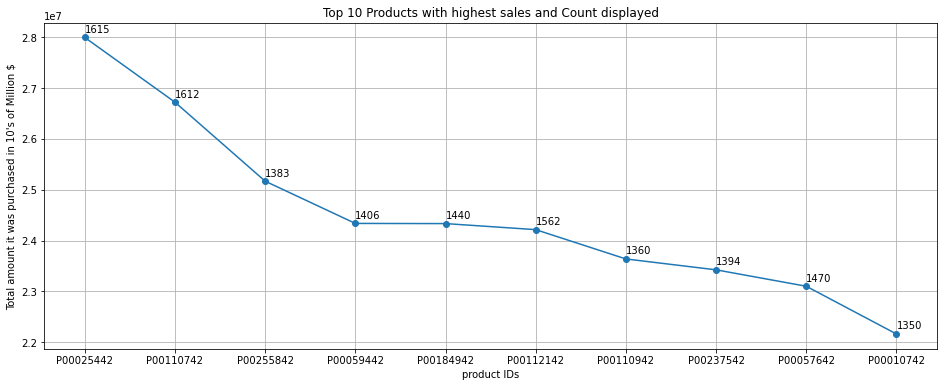

In [47]:
plt.figure(figsize=(16,6));
plt.grid();
plt.plot(data['Product_ID'],data['Purchase'],'o-');
plt.xlabel('product IDs');
plt.ylabel('Total amount it was purchased in 10\'s of Million $');
plt.title('Top 10 Products with highest sales and Count displayed');

for a,b,c in zip(data['Product_ID'], data['Purchase'], data['Count']): 
    plt.text(a, b+100000, str(c))  
plt.show();

We can see 10 products their purchase amount and count of products saled.
1. 1st product has 1615 pieces sold with total sale of 28 million and 2nd product with 1612 pieces sold but with 26.8 million. which means 1st product might have higher product cost.
2. 3rd product has 1383 units sold and 4th product has 1406 units sold but 4th product has low price than 3rd product so even it has higher products sold it has lesser sale amount than 3rd.
3. similarly we can observe for all the products.

### 6. Based on marital status and gender who has high purchase rate?

In [48]:
data_gen_mari = df.groupby(['Gender','Marital_Status'])['Gender'].count();
data_gen_mari

Gender  Marital_Status
F       0                  78821
        1                  56988
M       0                 245910
        1                 168349
Name: Gender, dtype: int64

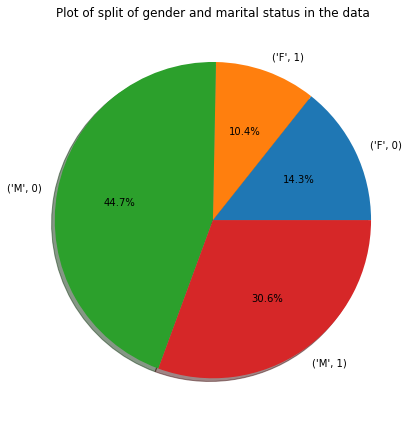

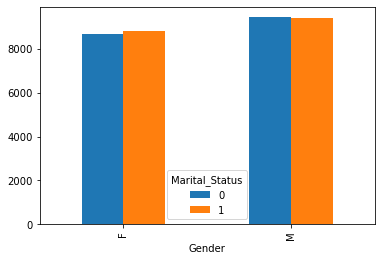

In [49]:
plt.figure(figsize=(16,16));
plt.subplot(211) # 2 hàng 1 cột vị trí thứ 1
plt.pie(data_gen_mari.values, labels = data_gen_mari.index, autopct='%1.1f%%',shadow=True);
plt.title('Plot of split of gender and marital status in the data');
data = df.groupby(['Gender','Marital_Status'])['Purchase'].mean()

data.unstack(level=1).plot(kind='bar');

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

### 7.Which product is popular for each age group?

In [63]:
data_pop = df.groupby('Age')['Product_ID'].apply(lambda x: x.value_counts().index[0]).reset_index()
 # index[0] lấy age làm index giữa các nhóm tuổi
data_pop 

,Age,Product_ID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


The product P00265242 has attracted most age groups. From 18-35,46-55+ all of them have this product has highest purchased in their age group. For Age group 0-17 P00255842 is more frequently purchased and for 36-45 P00025442 is most frequently purchased.

### 8. What is the purchase percent for each age group and for Gender Group in total purchase amount?

In [58]:
data_age = df.groupby('Age')['Purchase'].sum()
data_Sex = df.groupby('Gender')['Purchase'].sum()
print(data_age)
print("================")
print(data_Sex)

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64
Gender
F    1186232642
M    3909580100
Name: Purchase, dtype: int64


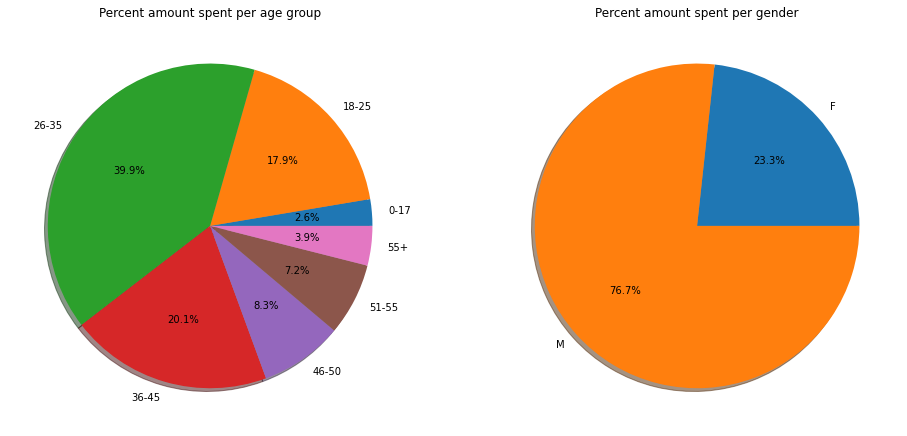

In [59]:
plt.figure(figsize=(16,16));
plt.subplot(121)
plt.pie(data_age.values, labels = data_age.index, autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per age group');
plt.subplot(122)
plt.pie(data_Sex.values,labels = data_Sex.index,autopct='%1.1f%%',shadow=True);
plt.title('Percent amount spent per gender');

# Conclusion

1. People of Age group 51-55 have purchased with high amount per person (9600 dollars per person).
2. 75% of total people visited were Male and 60% of total people were between Age 26-45.
3. People from Age group 26-35 collectively have spent more amount (40% of sale purchase is from this group).
4. P00265242 was the product which attratcted most of the adults and P00255842 attracted 0-17 Age group.
5. Unmarreid Male who are 45% in the datset have spent 9000 dollars per person.
6. High no of customers are of newly settled people but customers who are 2 years residents have spent 9400 dollars per person.
